# Import Required Modules

In [2]:
import pandas as pd
import yfinance as yf
import pulp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


# 1) Read the input data

1. Upload the input file 'Nifty50_weights.csv'
2. Read the data from the above file (in case of encoding error use encoding='mac_roman')
3. Create a list of mkts using the 'NSE Symbol' column
4. Add the string '.NS' to symbols to be able to download the data from yfinance

## Read the input data

In [3]:
df_wts = pd.read_csv('../data/Nifty50_weights.csv', encoding='mac_roman')

df_wts

,Sl No,Company,NSE Symbol,Industry,Weightage
0,1,Reliance Industries Ltd.,RELIANCE,OIL & GAS,0.109
1,2,HDFC Bank Ltd.,HDFCBANK,FINANCIAL SERVICES,0.086
2,3,Infosys Ltd.,INFY,IT,0.085
3,4,ICICI Bank Ltd.,ICICIBANK,FINANCIAL SERVICES,0.072
4,5,Housing Development Finance Corporation Ltd.,HDFC,FINANCIAL SERVICES,0.060
5,6,Tata Consultancy Services Ltd.,TCS,IT,0.051
6,7,Kotak Mahindra Bank Ltd.,KOTAKBANK,FINANCIAL SERVICES,0.036
7,8,Larsen & Toubro Ltd.,LT,CONSTRUCTION,0.030
8,9,State Bank Of India,SBIN,FINANCIAL SERVICES,0.027
9,10,Hindustan Unilever Ltd.,HINDUNILVR,CONSUMER GOODS,0.027


## Create list of markets

In [4]:
mkts = list(df_wts['NSE Symbol'])
print(mkts)

['RELIANCE', 'HDFCBANK', 'INFY', 'ICICIBANK', 'HDFC', 'TCS', 'KOTAKBANK', 'LT', 'SBIN', 'HINDUNILVR', 'AXISBANK', 'ITC', 'BAJFINANCE', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'MARUTI', 'TITAN', 'BAJAJFINSV', 'TATAMOTORS', 'TECHM', 'SUNPHARMA', 'TATASTEEL', 'M&M', 'WIPRO', 'ULTRACEMCO', 'POWERGRID', 'HINDALCO', 'NTPC', 'NESTLEIND', 'GRASIM', 'ONGC', 'JSWSTEEL', 'HDFCLIFE', 'INDUSINDBK', 'SBILIFE', 'DRREDDY', 'ADANIPORTS', 'DIVISLAB', 'CIPLA', 'BAJAJ-AUTO', 'TATACONSUM', 'UPL', 'BRITANNIA', 'BPCL', 'EICHERMOT', 'HEROMOTOCO', 'COALINDIA', 'SHREECEM', 'IOC']


In [5]:
nse_mkts = list(map((lambda mkt: mkt + '.NS'), mkts))
print(nse_mkts)

['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'HDFC.NS', 'TCS.NS', 'KOTAKBANK.NS', 'LT.NS', 'SBIN.NS', 'HINDUNILVR.NS', 'AXISBANK.NS', 'ITC.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'MARUTI.NS', 'TITAN.NS', 'BAJAJFINSV.NS', 'TATAMOTORS.NS', 'TECHM.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS', 'M&M.NS', 'WIPRO.NS', 'ULTRACEMCO.NS', 'POWERGRID.NS', 'HINDALCO.NS', 'NTPC.NS', 'NESTLEIND.NS', 'GRASIM.NS', 'ONGC.NS', 'JSWSTEEL.NS', 'HDFCLIFE.NS', 'INDUSINDBK.NS', 'SBILIFE.NS', 'DRREDDY.NS', 'ADANIPORTS.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'BAJAJ-AUTO.NS', 'TATACONSUM.NS', 'UPL.NS', 'BRITANNIA.NS', 'BPCL.NS', 'EICHERMOT.NS', 'HEROMOTOCO.NS', 'COALINDIA.NS', 'SHREECEM.NS', 'IOC.NS']


# 2) Create Sector wise thresholds

1. Replace the spaces in industry names with '_' (use df['col'].str.replace(' ',''))
2. Replace the '-' with '' from symbols in 'NSE Symbol'

  We are doing this because the linear optimization solver does not support spaces in names

3. Group by the industry and get the sum of weights for sector wise weights into a dictionary

## Replace space (' ') with blank in industry name

In [6]:
sectors = list(df_wts['Industry'].str.replace(' ', '_'))
print(sectors)

['OIL_&_GAS', 'FINANCIAL_SERVICES', 'IT', 'FINANCIAL_SERVICES', 'FINANCIAL_SERVICES', 'IT', 'FINANCIAL_SERVICES', 'CONSTRUCTION', 'FINANCIAL_SERVICES', 'CONSUMER_GOODS', 'FINANCIAL_SERVICES', 'CONSUMER_GOODS', 'FINANCIAL_SERVICES', 'TELECOM', 'CONSUMER_GOODS', 'IT', 'AUTOMOBILE', 'CONSUMER_GOODS', 'FINANCIAL_SERVICES', 'AUTOMOBILE', 'IT', 'PHARMA', 'METALS', 'AUTOMOBILE', 'IT', 'CEMENT_&_CEMENT_PRODUCTS', 'POWER', 'METALS', 'POWER', 'CONSUMER_GOODS', 'CEMENT_&_CEMENT_PRODUCTS', 'OIL_&_GAS', 'METALS', 'FINANCIAL_SERVICES', 'FINANCIAL_SERVICES', 'FINANCIAL_SERVICES', 'PHARMA', 'SERVICES', 'PHARMA', 'PHARMA', 'AUTOMOBILE', 'CONSUMER_GOODS', 'FERTILISERS_&_PESTICIDES', 'CONSUMER_GOODS', 'OIL_&_GAS', 'AUTOMOBILE', 'AUTOMOBILE', 'METALS', 'CEMENT_&_CEMENT_PRODUCTS', 'OIL_&_GAS']


In [7]:
np.unique(sectors)

array(['AUTOMOBILE', 'CEMENT_&_CEMENT_PRODUCTS', 'CONSTRUCTION',
       'CONSUMER_GOODS', 'FERTILISERS_&_PESTICIDES', 'FINANCIAL_SERVICES',
       'IT', 'METALS', 'OIL_&_GAS', 'PHARMA', 'POWER', 'SERVICES',
       'TELECOM'], dtype='<U24')

## Replace '-' in NSE Symbol with blank


Look for Bajaj-Auto before and after the replacement

In [8]:
df_wts['NSE Symbol'] = df_wts['NSE Symbol'].str.replace('-', '')
print(list(df_wts['NSE Symbol']))

['RELIANCE', 'HDFCBANK', 'INFY', 'ICICIBANK', 'HDFC', 'TCS', 'KOTAKBANK', 'LT', 'SBIN', 'HINDUNILVR', 'AXISBANK', 'ITC', 'BAJFINANCE', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'MARUTI', 'TITAN', 'BAJAJFINSV', 'TATAMOTORS', 'TECHM', 'SUNPHARMA', 'TATASTEEL', 'M&M', 'WIPRO', 'ULTRACEMCO', 'POWERGRID', 'HINDALCO', 'NTPC', 'NESTLEIND', 'GRASIM', 'ONGC', 'JSWSTEEL', 'HDFCLIFE', 'INDUSINDBK', 'SBILIFE', 'DRREDDY', 'ADANIPORTS', 'DIVISLAB', 'CIPLA', 'BAJAJAUTO', 'TATACONSUM', 'UPL', 'BRITANNIA', 'BPCL', 'EICHERMOT', 'HEROMOTOCO', 'COALINDIA', 'SHREECEM', 'IOC']


['RELIANCE', 'HDFCBANK', 'INFY', 'ICICIBANK', 'HDFC', 'TCS', 'KOTAKBANK', 'LT', 'SBIN', 'HINDUNILVR', 'AXISBANK', 'ITC', 'BAJFINANCE', 'BHARTIARTL', 'ASIANPAINT', 'HCLTECH', 'MARUTI', 'TITAN', 'BAJAJFINSV', 'TATAMOTORS', 'TECHM', 'SUNPHARMA', 'TATASTEEL', 'M&M', 'WIPRO', 'ULTRACEMCO', 'POWERGRID', 'HINDALCO', 'NTPC', 'NESTLEIND', 'GRASIM', 'ONGC', 'JSWSTEEL', 'HDFCLIFE', 'INDUSINDBK', 'SBILIFE', 'DRREDDY', 'ADANIPORTS', 'DIVISLAB', 'CIPLA', 'BAJAJAUTO', 'TATACONSUM', 'UPL', 'BRITANNIA', 'BPCL', 'EICHERMOT', 'HEROMOTOCO', 'COALINDIA', 'SHREECEM', 'IOC']


## Get sector wise sum of weights

In [9]:
df_wts.groupby('Industry')['Weightage'].sum()

Industry
AUTOMOBILE                  0.054
CEMENT & CEMENT PRODUCTS    0.024
CONSTRUCTION                0.030
CONSUMER GOODS              0.105
FERTILISERS & PESTICIDES    0.006
FINANCIAL SERVICES          0.368
IT                          0.175
METALS                      0.032
OIL & GAS                   0.126
PHARMA                      0.032
POWER                       0.019
SERVICES                    0.007
TELECOM                     0.023
Name: Weightage, dtype: float64

# 3) Nifty Data and period returns

1. Download the adjusted close prices of all markets from yfinance
2. Remove '.NS' & '-' from the column names 

  **use:** series.str.replace('.NS','').str.replace(' ','') **or** [x.replace('.NS','').replace('-','') for x in columnnames])

  We are doing this because the linear optimization solver does not support spaces in names 

3. Based on the input period get the rolling returns from the past

## Downlad data from Yahoo

In [10]:
df_mkts = yf.download(tickers=nse_mkts)['Adj Close']
df_mkts.tail()

[*********************100%***********************]  50 of 50 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,716.299988,3152.250000,773.049988,3564.649902,15689.549805,7000.250000,729.299988,397.049988,3535.300049,945.000000,...,834.500000,727.299988,517.750000,1085.550049,3736.250000,1479.000000,2360.300049,7216.399902,776.500000,572.599976
2022-02-01,738.750000,3196.250000,781.900024,3534.449951,15903.849609,7014.600098,723.049988,378.850006,3656.600098,946.400024,...,891.750000,736.099976,504.299988,1167.349976,3800.649902,1505.750000,2431.800049,7516.250000,785.000000,576.650024
2022-02-02,745.200012,3197.699951,804.099976,3535.000000,16706.000000,7247.450195,725.049988,382.100006,3621.050049,951.799988,...,890.650024,742.450012,506.399994,1167.500000,3856.199951,1482.949951,2464.000000,7441.000000,785.950012,588.000000
2022-02-03,732.500000,3203.000000,799.549988,3621.100098,16348.099609,7110.649902,721.650024,377.049988,3562.399902,952.750000,...,883.549988,738.099976,504.500000,1166.599976,3824.600098,1454.300049,2474.949951,7375.350098,773.500000,578.250000
2022-02-04,726.950012,3236.649902,798.549988,3565.350098,16205.750000,7158.399902,720.200012,375.649994,3562.000000,946.099976,...,893.950012,733.799988,500.600006,1176.300049,3814.899902,1448.199951,2471.149902,7439.649902,767.200012,571.750000


## Process the column names

In [13]:
columnnames = df_mkts.columns

In [16]:
new_columns = [x.replace('.NS','').replace('-','') for x in columnnames]
df_mkts.columns = new_columns
df_mkts.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJAUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,716.299988,3152.250000,773.049988,3564.649902,15689.549805,7000.250000,729.299988,397.049988,3535.300049,945.000000,...,834.500000,727.299988,517.750000,1085.550049,3736.250000,1479.000000,2360.300049,7216.399902,776.500000,572.599976
2022-02-01,738.750000,3196.250000,781.900024,3534.449951,15903.849609,7014.600098,723.049988,378.850006,3656.600098,946.400024,...,891.750000,736.099976,504.299988,1167.349976,3800.649902,1505.750000,2431.800049,7516.250000,785.000000,576.650024
2022-02-02,745.200012,3197.699951,804.099976,3535.000000,16706.000000,7247.450195,725.049988,382.100006,3621.050049,951.799988,...,890.650024,742.450012,506.399994,1167.500000,3856.199951,1482.949951,2464.000000,7441.000000,785.950012,588.000000
2022-02-03,732.500000,3203.000000,799.549988,3621.100098,16348.099609,7110.649902,721.650024,377.049988,3562.399902,952.750000,...,883.549988,738.099976,504.500000,1166.599976,3824.600098,1454.300049,2474.949951,7375.350098,773.500000,578.250000
2022-02-04,726.950012,3236.649902,798.549988,3565.350098,16205.750000,7158.399902,720.200012,375.649994,3562.000000,946.099976,...,893.950012,733.799988,500.600006,1176.300049,3814.899902,1448.199951,2471.149902,7439.649902,767.200012,571.750000


## For a given period get the rolling period returns

period = 66

In [17]:
df_mkts_rets_q = df_mkts.pct_change(periods=66)
df_mkts_rets_q.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJAUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,CIPLA,...,SUNPHARMA,TATACONSUM,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,-0.044806,0.062688,-0.081779,-0.059893,-0.145140,-0.108890,0.047544,-0.068072,-0.042651,0.041322,...,0.025814,-0.100878,0.017891,-0.192089,0.074719,-0.044509,-0.038476,-0.007250,0.088679,-0.141612
2022-02-01,-0.009519,0.034050,-0.007111,-0.064094,-0.117041,-0.062489,0.029473,-0.103825,-0.011155,0.025908,...,0.080778,-0.100947,0.012854,-0.119745,0.091003,-0.030050,-0.011504,0.022035,0.058665,-0.139340
2022-02-02,0.082982,0.026121,0.060328,-0.044775,-0.071254,-0.031640,0.051178,-0.081316,-0.016527,0.067339,...,0.102836,-0.083055,0.052697,-0.101647,0.128981,-0.023212,0.037408,-0.000759,0.076791,-0.103429
2022-02-03,0.056999,0.033192,0.077561,-0.023238,-0.082657,-0.039127,0.052966,-0.086730,-0.030837,0.052704,...,0.111384,-0.088203,0.043002,-0.113492,0.127605,-0.006141,0.038346,-0.034141,0.044988,-0.104459
2022-02-04,0.032013,0.036790,0.061408,-0.043154,-0.077421,-0.034469,0.010807,-0.098645,-0.031578,0.040528,...,0.101195,-0.110438,0.030677,-0.138179,0.099299,-0.039114,0.026950,-0.043144,0.065482,-0.126278


# 4) Create data frame to start optimization

1. Create a data frame with following columns

  Latest day's past period returns
  
  Sector

  Please note this datarame needs to have stock symbol as index

## Latest day returns

In [24]:
latest_rets = df_mkts_rets_q.iloc[-1]
latest_rets

ADANIPORTS    0.032013
ASIANPAINT    0.036790
AXISBANK      0.061408
BAJAJAUTO    -0.043154
BAJAJFINSV   -0.077421
BAJFINANCE   -0.034469
BHARTIARTL    0.010807
BPCL         -0.098645
BRITANNIA    -0.031578
CIPLA         0.040528
COALINDIA    -0.004532
DIVISLAB     -0.176677
DRREDDY      -0.093618
EICHERMOT     0.027891
GRASIM       -0.030017
HCLTECH      -0.013129
HDFC         -0.133209
HDFCBANK     -0.050645
HDFCLIFE     -0.094883
HEROMOTOCO    0.015313
HINDALCO      0.098296
HINDUNILVR   -0.041751
ICICIBANK     0.001430
INDUSINDBK   -0.222154
INFY          0.024146
IOC          -0.021899
ITC           0.032841
JSWSTEEL     -0.045867
KOTAKBANK    -0.092608
LT            0.084997
M&M          -0.032918
MARUTI        0.122775
NESTLEIND    -0.032099
NTPC          0.028399
ONGC          0.148344
POWERGRID     0.133368
RELIANCE     -0.081370
SBILIFE       0.007521
SBIN          0.028311
SHREECEM     -0.151710
SUNPHARMA     0.101195
TATACONSUM   -0.110438
TATAMOTORS    0.030677
TATASTEEL  

In [20]:
df_wts['NSE Symbol']

,Sl No,Company,NSE Symbol,Industry,Weightage
0,1,Reliance Industries Ltd.,RELIANCE,OIL & GAS,0.109
1,2,HDFC Bank Ltd.,HDFCBANK,FINANCIAL SERVICES,0.086
2,3,Infosys Ltd.,INFY,IT,0.085
3,4,ICICI Bank Ltd.,ICICIBANK,FINANCIAL SERVICES,0.072
4,5,Housing Development Finance Corporation Ltd.,HDFC,FINANCIAL SERVICES,0.060
5,6,Tata Consultancy Services Ltd.,TCS,IT,0.051
6,7,Kotak Mahindra Bank Ltd.,KOTAKBANK,FINANCIAL SERVICES,0.036
7,8,Larsen & Toubro Ltd.,LT,CONSTRUCTION,0.030
8,9,State Bank Of India,SBIN,FINANCIAL SERVICES,0.027
9,10,Hindustan Unilever Ltd.,HINDUNILVR,CONSUMER GOODS,0.027


## Dataframe to start optimization

,past_rets,sector
ADANIPORTS,0.032013,SERVICES
ASIANPAINT,0.036790,CONSUMER_GOODS
AXISBANK,0.061408,FINANCIAL_SERVICES
BAJAJAUTO,-0.043154,AUTOMOBILE
BAJAJFINSV,-0.077421,FINANCIAL_SERVICES


# 5) Create a column of variable names for LP solver

In [ ]:
per_mkt_upper_bound = 0.3
per_mkt_lower_bound = 0

In [ ]:
var_names = []
for var in get_wts_start.index:
    var_names.append(pulp.LpVariable(var, lowBound=per_mkt_lower_bound, 
                                     upBound=per_mkt_upper_bound))
get_wts_start['var_name'] = var_names
get_wts_start.head()

,past_rets,sector,var_name
ADANIPORTS,0.032013,SERVICES,ADANIPORTS
ASIANPAINT,0.036790,CONSUMER_GOODS,ASIANPAINT
AXISBANK,0.061408,FINANCIAL_SERVICES,AXISBANK
BAJAJAUTO,-0.043154,AUTOMOBILE,BAJAJAUTO
BAJAJFINSV,-0.077421,FINANCIAL_SERVICES,BAJAJFINSV


# 6) Initialize the solver

In [ ]:
maximize_rets = pulp.LpProblem("Maximizing_the_portfolio_returns", pulp.LpMaximize)
maximize_rets

Maximizing_the_portfolio_returns:
MAXIMIZE
None
VARIABLES

# 7) Create an objective function

In [ ]:
get_wts_start['objective_function'] = get_wts_start['var_name'] * get_wts_start['past_rets']
portfolio_rets_eq = list(get_wts_start['objective_function'])
maximize_rets += pulp.lpSum([i for i in portfolio_rets_eq]) ,'Objective_(Portfolio_PL)'
maximize_rets

Maximizing_the_portfolio_returns:
MAXIMIZE
0.032013042321692664*ADANIPORTS + 0.03678962512629136*ASIANPAINT + 0.06140760777063914*AXISBANK + -0.04315441109504392*BAJAJAUTO + -0.07742072785228848*BAJAJFINSV + -0.03446884403544048*BAJFINANCE + 0.010807034676534988*BHARTIARTL + -0.09864477808447081*BPCL + -0.03157834928634595*BRITANNIA + 0.04052788076539726*CIPLA + -0.004532268215579949*COALINDIA + -0.17667651597210665*DIVISLAB + -0.09361754922269783*DRREDDY + 0.027890586853027255*EICHERMOT + -0.0300167418512437*GRASIM + -0.013129394808175654*HCLTECH + -0.13320866278024346*HDFC + -0.050644768177434685*HDFCBANK + -0.09488259403488841*HDFCLIFE + 0.01531318296558326*HEROMOTOCO + 0.0982955790390605*HINDALCO + -0.04175148349578606*HINDUNILVR + 0.0014304805871159232*ICICIBANK + -0.22215441641580058*INDUSINDBK + 0.02414630486091207*INFY + -0.02189918040137706*IOC + 0.0328410700806534*ITC + -0.045866951246381404*JSWSTEEL + -0.09260777694588251*KOTAKBANK + 0.08499734183366359*LT + -0.0329177505400

# 8) 1st constraint to make the sum of allocation weights to 1

In [ ]:
sum_of_wts = list(get_wts_start['var_name'])
maximize_rets += pulp.lpSum([i for i in sum_of_wts]) == 1 ,'Sum_of_wts_=_1'
maximize_rets

Maximizing_the_portfolio_returns:
MAXIMIZE
0.032013042321692664*ADANIPORTS + 0.03678962512629136*ASIANPAINT + 0.06140760777063914*AXISBANK + -0.04315441109504392*BAJAJAUTO + -0.07742072785228848*BAJAJFINSV + -0.03446884403544048*BAJFINANCE + 0.010807034676534988*BHARTIARTL + -0.09864477808447081*BPCL + -0.03157834928634595*BRITANNIA + 0.04052788076539726*CIPLA + -0.004532268215579949*COALINDIA + -0.17667651597210665*DIVISLAB + -0.09361754922269783*DRREDDY + 0.027890586853027255*EICHERMOT + -0.0300167418512437*GRASIM + -0.013129394808175654*HCLTECH + -0.13320866278024346*HDFC + -0.050644768177434685*HDFCBANK + -0.09488259403488841*HDFCLIFE + 0.01531318296558326*HEROMOTOCO + 0.0982955790390605*HINDALCO + -0.04175148349578606*HINDUNILVR + 0.0014304805871159232*ICICIBANK + -0.22215441641580058*INDUSINDBK + 0.02414630486091207*INFY + -0.02189918040137706*IOC + 0.0328410700806534*ITC + -0.045866951246381404*JSWSTEEL + -0.09260777694588251*KOTAKBANK + 0.08499734183366359*LT + -0.0329177505400

# 9) Sector wise constraints based on the thresholds

In [ ]:
for sector,thresh in sector_wts.items():
    sector_vars = get_wts_start.loc[get_wts_start['sector']==sector,:].copy()
    sector_vars = list(sector_vars['var_name'])
    
    #Use this first to see there is an infeasability due to tight constraints
    #maximize_rets += pulp.lpSum([i for i in sector_vars]) == thresh , f'{sector}=={thresh}'
    
    #Then use this to ease constraints
    maximize_rets += pulp.lpSum([i for i in sector_vars])>= 0.99*thresh , f'{sector}>={thresh}' 
    maximize_rets += pulp.lpSum([i for i in sector_vars]) <= 1.01 * thresh , f'{sector}<={thresh}' 

maximize_rets

Maximizing_the_portfolio_returns:
MAXIMIZE
0.032013042321692664*ADANIPORTS + 0.03678962512629136*ASIANPAINT + 0.06140760777063914*AXISBANK + -0.04315441109504392*BAJAJAUTO + -0.07742072785228848*BAJAJFINSV + -0.03446884403544048*BAJFINANCE + 0.010807034676534988*BHARTIARTL + -0.09864477808447081*BPCL + -0.03157834928634595*BRITANNIA + 0.04052788076539726*CIPLA + -0.004532268215579949*COALINDIA + -0.17667651597210665*DIVISLAB + -0.09361754922269783*DRREDDY + 0.027890586853027255*EICHERMOT + -0.0300167418512437*GRASIM + -0.013129394808175654*HCLTECH + -0.13320866278024346*HDFC + -0.050644768177434685*HDFCBANK + -0.09488259403488841*HDFCLIFE + 0.01531318296558326*HEROMOTOCO + 0.0982955790390605*HINDALCO + -0.04175148349578606*HINDUNILVR + 0.0014304805871159232*ICICIBANK + -0.22215441641580058*INDUSINDBK + 0.02414630486091207*INFY + -0.02189918040137706*IOC + 0.0328410700806534*ITC + -0.045866951246381404*JSWSTEEL + -0.09260777694588251*KOTAKBANK + 0.08499734183366359*LT + -0.0329177505400

# 10) Run the Solver

In [ ]:
maximize_rets.solve()
print('Solver Status: ',pulp.LpStatus[maximize_rets.status])
print("The optimized solution :", pulp.value(maximize_rets.objective))

Solver Status:  Optimal
The optimized solution : 0.07888923245983864


# 11) Weights from solver

In [ ]:
final_wts = []
for variable in maximize_rets.variables():
    final_wts.append(variable.varValue)
    # print(variable.name, variable.varValue)
get_wts = get_wts_start.copy()
get_wts['final_wts'] = final_wts
get_wts.head()

,past_rets,sector,var_name,objective_function,final_wts
ADANIPORTS,0.032013,SERVICES,ADANIPORTS,{ADANIPORTS: 0.032013042321692664},0.00693
ASIANPAINT,0.036790,CONSUMER_GOODS,ASIANPAINT,{ASIANPAINT: 0.03678962512629136},0.10395
AXISBANK,0.061408,FINANCIAL_SERVICES,AXISBANK,{AXISBANK: 0.06140760777063914},0.30000
BAJAJAUTO,-0.043154,AUTOMOBILE,BAJAJAUTO,{BAJAJAUTO: -0.04315441109504392},0.00000
BAJAJFINSV,-0.077421,FINANCIAL_SERVICES,BAJAJFINSV,{BAJAJFINSV: -0.07742072785228848},0.00000


# 12) Attach the intital weights for comaprision

,past_rets,sector,var_name,objective_function,final_wts,IndexWt
ADANIPORTS,0.032013,SERVICES,ADANIPORTS,{ADANIPORTS: 0.032013042321692664},0.00693,0.007
ASIANPAINT,0.036790,CONSUMER_GOODS,ASIANPAINT,{ASIANPAINT: 0.03678962512629136},0.10395,0.019
AXISBANK,0.061408,FINANCIAL_SERVICES,AXISBANK,{AXISBANK: 0.06140760777063914},0.30000,0.026
BAJAJAUTO,-0.043154,AUTOMOBILE,BAJAJAUTO,{BAJAJAUTO: -0.04315441109504392},0.00000,0.006
BAJAJFINSV,-0.077421,FINANCIAL_SERVICES,BAJAJFINSV,{BAJAJFINSV: -0.07742072785228848},0.00000,0.013


# 13) Plot the difference in final and intial weights

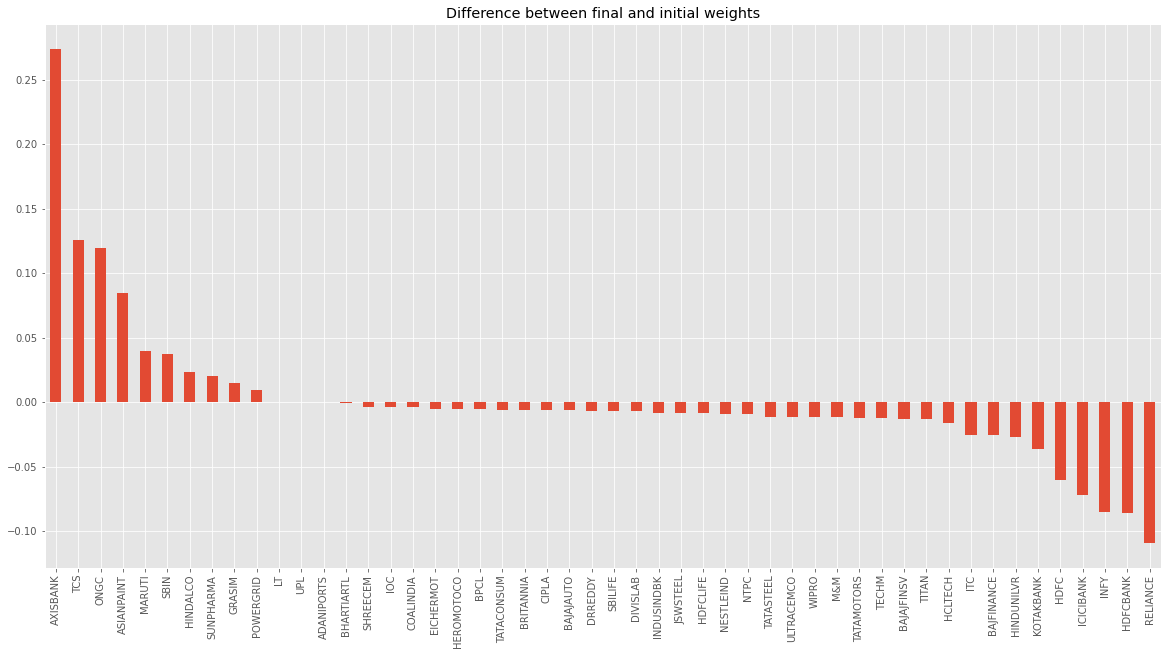

# 14) Plot the intial and final actual weights

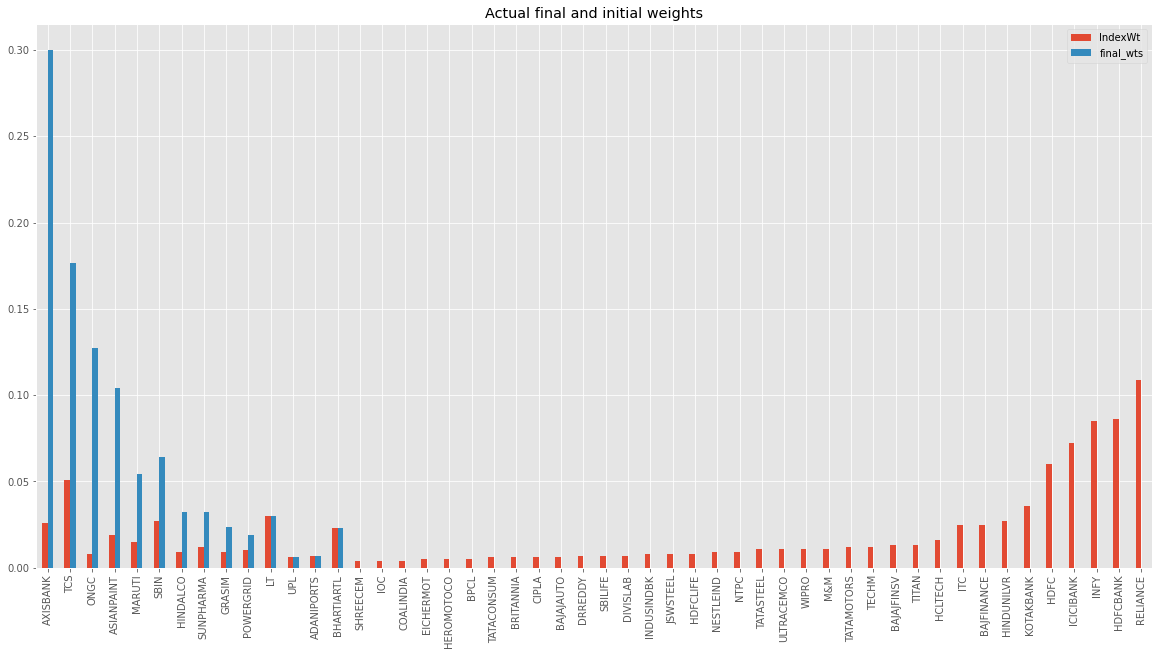

# 15) Get the sector wise count of markets with non zero weights initially and finally also the sector weigths before and after

,initial_wts,final_wts,initial_non_zero_mkts_count,final_non_zero_mkts_count
AUTOMOBILE,0.054,0.05454,6,1
CEMENT_&_CEMENT_PRODUCTS,0.024,0.02376,3,1
CONSTRUCTION,0.030,0.02995,1,1
CONSUMER_GOODS,0.105,0.10395,7,1
FERTILISERS_&_PESTICIDES,0.006,0.00594,1,1
FINANCIAL_SERVICES,0.368,0.36432,11,2
IT,0.175,0.17675,5,1
METALS,0.032,0.03232,4,1
OIL_&_GAS,0.126,0.12726,4,1
PHARMA,0.032,0.03232,4,1


# Keep Experimenting

Keep changing the upper boundaries, past periods or the constraints to see how the final weights are changing